Populating the interactive namespace from numpy and matplotlib


/Users/george/miniconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


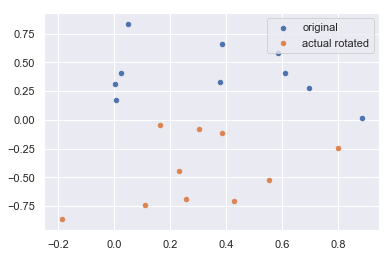

In [1]:
%pylab inline
from datagen import DataGenerator
from plotter import plot_one

import keras
from keras import layers, models, losses

DIMS = 2
PTS = 10
BATCH_SIZE = 1000
SHAPE = (PTS, DIMS)
dg = DataGenerator(DIMS, PTS, BATCH_SIZE, 100, 0.01)

data, rotmat = dg.get_one()

plot_one(data[0, :, :2], rotmat, s=20)

In [6]:
inputs = layers.Input(shape=(PTS, DIMS*2))
x = layers.Flatten()(inputs)
x = layers.Dense(50, activation='relu')(x)
x = layers.Dense(50, activation='relu')(x)
x = layers.Dense(DIMS*2)(x)
x = layers.Reshape((DIMS, DIMS))(x)
model = models.Model(inputs, x)
opt = keras.optimizers.Adam()
model.compile(loss=losses.mean_squared_error, optimizer=opt)

In [7]:
model.fit_generator(dg, epochs=10)

Epoch 1/10
100/100 [==============================] - 4s 37ms/step - loss: 0.1164
Epoch 2/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0208
Epoch 3/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0129
Epoch 4/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0087
Epoch 5/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0065
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0049
Epoch 7/10
100/100 [==============================] - 3s 31ms/step - loss: 0.0036
Epoch 8/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0025
Epoch 9/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0019
Epoch 10/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0015


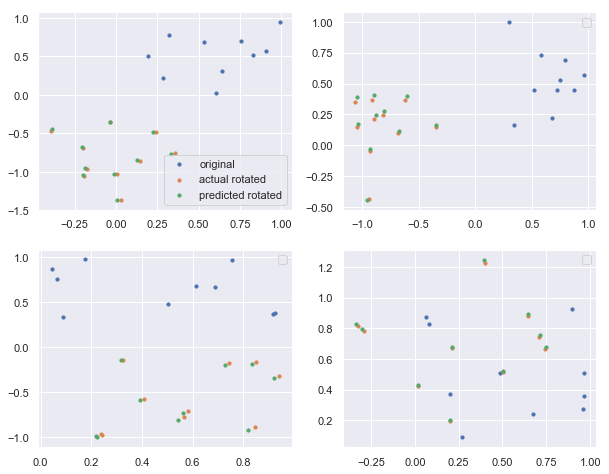

In [8]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    data, rotmat = dg.get_one()
    pred = model.predict(data)
    plot_one(data[0, :, :2], rotmat, pred, s=10)
    if i > 0:
        plt.legend([])